# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

In [7]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [8]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $83316.34
The current value of your 5.3 ETH is $11855.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
ticker_data.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-03-12 00:00:00-05:00  113.88  113.91  113.705  113.79  4339393  392.07   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-12 00:00:00-05:00  394.21  391.2  394.09  56997361

In [12]:
# Pick AGG and SPY close prices
agg_price = float(ticker_data["AGG"]["close"])
spy_price = float(ticker_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $113.79
Current SPY closing price: $394.09


In [13]:
# Compute the current value of shares
agg_value = agg_price * my_agg
spy_value = spy_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19704.50
The current value of your 200 AGG shares is $22758.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create Total Savings DataFrame - Crypto & Shares
savings_data = [my_eth_value + my_btc_value, agg_value + spy_value]

# Display Total Savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto","shares"])
df_savings

,amount
crypto,95171.646616
shares,42462.500000


<AxesSubplot:title={'center':'Portfolio Composition - Stocks & Crypto'}, ylabel='amount'>

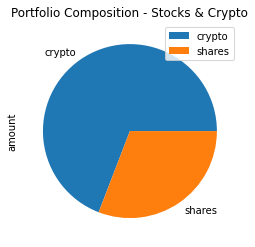

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition - Stocks & Crypto")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_sum = float(df_savings.sum())

#Calculate savings difference
savings_delta = savings_sum - emergency_fund

# Validate saving health use if statement to determine savings health
if savings_sum > emergency_fund:
    print(f"Congratulations! You have savings of ${savings_sum:0.2f} enough money to cover your emergency fund of ${emergency_fund:0.2f} by ${savings_delta:0.2f}.")
elif savings_sum == emergency_fund:
    print(f"You have reached your savings goal to meet your emergency fund requirements.")
else:
    print(f"Your savings are not enough to cover emergency requirements by ${savings_delta:0.2f}")

Congratulations! You have savings of $137634.15 enough money to cover your emergency fund of $36000.00 by $101634.15.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-12', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
ticker_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Preview DataFrame
ticker_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-19 00:00:00-04:00  117.81  117.86  117.72  117.787  3895071  348.62   
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855  343.46   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530  343.33   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3938694  342.96   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3482671  345.93   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-19 00:00:00-04:00  349.33  341.04  342.02  51690440  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34  48206853  
2020-10-21 00:00:00-04:00  345.67  342.40  342.69  46745662  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45094573  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_split_dist = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_split_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2020-10-19 00:00:00-04:00  117.81  117.86  117.72  117.787  3895071   
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3938694   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3482671   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-10-19 00:00:00-04:00          NaN  348.62  349.33  341.04  342.02   
2020-10-20 00:00:00-04:00    -0.001248  343.46  346.88  342.64  343.34   
2020-10-21 00:00:00-04:00    -0.001063  343.33  345.67  342.40  342.69   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.65  344.63   
2020-10-23 00:00:00-04:00     0.001364  345.93  345.99  343.13  345.76   

                                                  
                             volume daily_return  
time                                              
2020-10-19 00:00:00-04:00  51690440          NaN  
2020-10-20 00:00:00-04:00  48206853     0.003859  
2020-10-21 00:00:00-04:00  46745662    -0.001893  
2020-10-22 00:00:00-04:00  45094573     0.005661  
2020-10-23 00:00:00-04:00  38718140     0.003279

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_split_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
# Plot simulation outcomes
line_plot = MC_split_dist.plot_simulation()

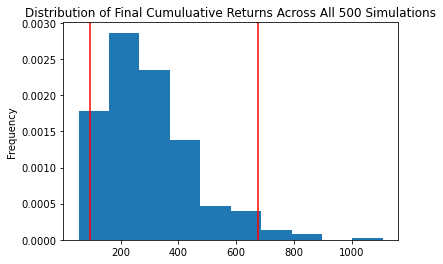

In [51]:
# Plot probability distribution and confidence intervals
dist_plot = MC_split_dist.plot_distribution()

### Retirement Analysis

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
split_tbl = MC_split_dist.summarize_cumulative_return()

# Print summary statistics
print(split_tbl)

count            500.000000
mean             297.807464
std              156.591489
min               53.808841
25%              181.664132
50%              268.764441
75%              385.272734
max             1108.049261
95% CI Lower      92.896483
95% CI Upper     675.068916
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [53]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(split_tbl[8]*initial_investment)
even_ci_upper = round(split_tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1857930 and $13501378


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [54]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower = round(split_tbl[8]*initial_investment)
even_ci_upper = round(split_tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $2786894 and $20252067


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_split_dist = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_split_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2020-10-19 00:00:00-04:00  117.81  117.87  117.72  117.787  4231106   
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3933253   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3483335   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-10-19 00:00:00-04:00          NaN  348.62  349.33  341.04  342.02   
2020-10-20 00:00:00-04:00    -0.001248  343.46  346.88  342.64  343.34   
2020-10-21 00:00:00-04:00    -0.001063  343.33  345.67  342.45  342.69   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.65  344.63   
2020-10-23 00:00:00-04:00     0.001364  345.93  345.99  343.13  345.76   

                                                  
                             volume daily_return  
time                                              
2020-10-19 00:00:00-04:00  54462156          NaN  
2020-10-20 00:00:00-04:00  48206853     0.003859  
2020-10-21 00:00:00-04:00  43419032    -0.001893  
2020-10-22 00:00:00-04:00  45033179     0.005661  
2020-10-23 00:00:00-04:00  38762783     0.003279

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

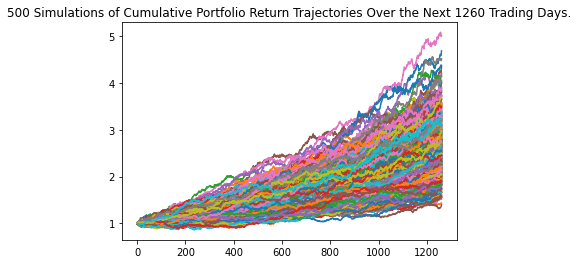

In [57]:
# Plot simulation outcomes
line_plot = MC_split_dist.plot_simulation()

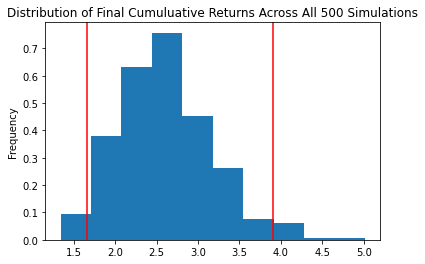

In [62]:
# Plot probability distribution and confidence intervals
dist_plot = MC_split_dist.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
split_tbl = MC_split_dist.summarize_cumulative_return()

# Print summary statistics
print(split_tbl)

count           500.000000
mean              2.590256
std               0.560728
min               1.341964
25%               2.166474
50%               2.534922
75%               2.898422
max               5.012546
95% CI Lower      1.658219
95% CI Upper      3.909094
Name: 1260, dtype: float64


In [64]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(split_tbl[8]*initial_investment)
ci_upper_five = round(split_tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $99493 and $234546


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_split_dist = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_split_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2020-10-19 00:00:00-04:00  117.81  117.86  117.72  117.787  3895071   
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3938694   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3482671   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-10-19 00:00:00-04:00          NaN  348.62  349.33  341.04  342.02   
2020-10-20 00:00:00-04:00    -0.001248  343.46  346.88  342.64  343.34   
2020-10-21 00:00:00-04:00    -0.001063  343.33  345.67  342.40  342.69   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.65  344.63   
2020-10-23 00:00:00-04:00     0.001364  345.93  345.99  343.13  345.76   

                                                  
                             volume daily_return  
time                                              
2020-10-19 00:00:00-04:00  51690440          NaN  
2020-10-20 00:00:00-04:00  48206853     0.003859  
2020-10-21 00:00:00-04:00  46745662    -0.001893  
2020-10-22 00:00:00-04:00  45094573     0.005661  
2020-10-23 00:00:00-04:00  38718140     0.003279

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

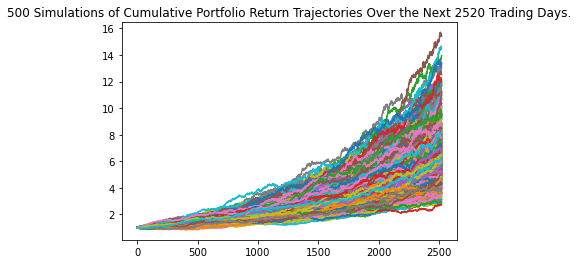

In [67]:
# Plot simulation outcomes
line_plot = MC_split_dist.plot_simulation()

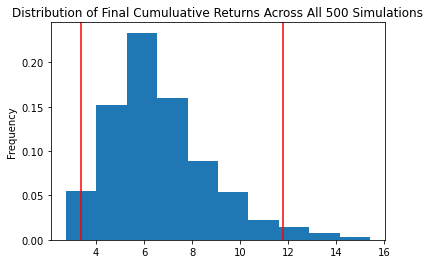

In [68]:
# Plot probability distribution and confidence intervals
dist_plot = MC_split_dist.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
split_tbl = MC_split_dist.summarize_cumulative_return()

# Print summary statistics
print(split_tbl)

count           500.000000
mean              6.628848
std               2.096050
min               2.733748
25%               5.231489
50%               6.284903
75%               7.730530
max              15.407342
95% CI Lower      3.364510
95% CI Upper     11.763246
Name: 2520, dtype: float64


In [70]:
# Set initial investment
intial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(split_tbl[8]*initial_investment)
ci_upper_ten = round(split_tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $201871 and $705795
